In [11]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import pathlib
import numpy as np
from matplotlib import pyplot as plt
from shapely.geometry import Point, Polygon, LineString

# Storm Forecasts & Track
Storm forecasts and historical track will be published for each in-game day.

In [3]:
# Forecasts
day1_forecast = gpd.read_file('https://files.bwsi-remote-sensing.net/data/final/day1/day1_forecasts.geojson')

In [6]:
random_color = lambda: np.random.random(3)

In [7]:
# look at the forecasts
day1_forecast

,prediction,forecastHour,datetime,maxWinds,category,geometry
0,1,12,2021-07-28T08:00:00,70,1,POINT (-69.75497 37.90491)
1,1,24,2021-07-28T20:00:00,75,1,POINT (-70.50738 38.86856)
2,1,36,2021-07-29T08:00:00,85,2,POINT (-71.35866 39.41313)
3,1,48,2021-07-29T20:00:00,85,2,POINT (-71.72152 40.51758)
4,1,60,2021-07-30T08:00:00,100,3,POINT (-71.48969 41.18486)
...,...,...,...,...,...,...
155,20,48,2021-07-29T20:00:00,85,2,POINT (-71.49297 40.27587)
156,20,60,2021-07-30T08:00:00,100,3,POINT (-70.95934 42.12895)
157,20,72,2021-07-30T20:00:00,105,3,POINT (-71.61717 40.70945)
158,20,96,2021-07-31T20:00:00,90,2,POINT (-70.44554 43.65152)


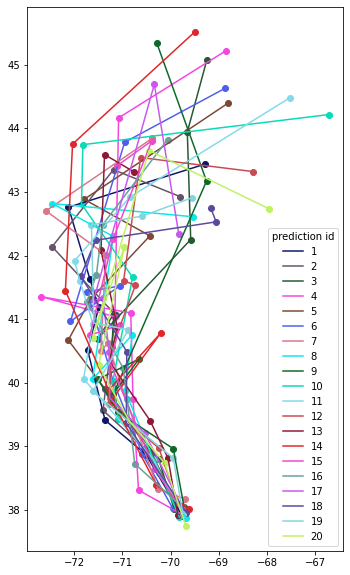

In [16]:
# each forecast report has a number of possible hurricane routes
# they are identified by the prediction column
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for pred_id, pred in day1_forecast.groupby('prediction'):
    c = random_color()
    pred.plot(color=c, ax=ax)
    line_to_plot = LineString(pred.geometry.values)
    ax.plot(line_to_plot.xy[0], line_to_plot.xy[1], color=c, label=f'{pred_id}')
ax.legend(title='prediction id')

<AxesSubplot:>

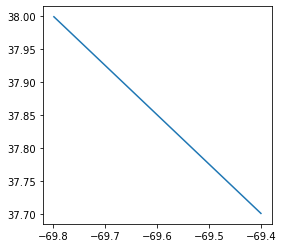

In [17]:
# track shows where the storm actually went in the past
day1_track = gpd.read_file('https://files.bwsi-remote-sensing.net/data/final/day1/day1_track_past.geojson')
day1_track.plot()

# Game Grid
This is the grid that represents the scope of the response, and also the transportation network
It uses the [Military Grid Reference System](https://en.wikipedia.org/wiki/Military_Grid_Reference_System) to divide the world into a grid. There is a unique alphanumeric string that identifies each cell. We are working at the 1km resolution of the grid. See also the [US National Grid](https://www.fgdc.gov/usng/how-to-read-usng) which is nearly identical, except for some [edge-cases](https://www.maptools.com/tutorials/mgrs_usng_diffs).

In [18]:
# downloading pre-hurricane game grid (pretty big file ~ 111 MB)
!wget https://files.bwsi-remote-sensing.net/data/final/game_grid_2021.geojson

--2021-07-29 13:39:40--  https://files.bwsi-remote-sensing.net/data/final/game_grid_2021.geojson
Resolving files.bwsi-remote-sensing.net (files.bwsi-remote-sensing.net)... 100.20.1.230, 54.201.56.223, 52.37.91.126, ...
Connecting to files.bwsi-remote-sensing.net (files.bwsi-remote-sensing.net)|100.20.1.230|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116721567 (111M)
Saving to: ‘game_grid_2021.geojson’

game_grid_2021.geoj 100%[===================>] 111.31M   272MB/s    in 0.4s    

2021-07-29 13:39:40 (272 MB/s) - ‘game_grid_2021.geojson’ saved [116721567/116721567]



In [19]:
game_grid = gpd.read_file('game_grid_2021.geojson')

In [20]:
game_grid

,EASTING,NORTHING,kmSQ_ID,GZD,Shape_Leng,MGRS,MGRS_10km,transport_score,geometry
0,596000mE,4984000mN,WQ,18T,400000.000000,18TWQ9684,18TWQ98,1,"POLYGON ((-73.76921 45.00282, -73.78190 45.002..."
1,597000mE,4984000mN,WQ,18T,400000.000000,18TWQ9784,18TWQ98,1,"POLYGON ((-73.75653 45.00268, -73.76921 45.002..."
2,598000mE,4984000mN,WQ,18T,400000.000000,18TWQ9884,18TWQ98,1,"POLYGON ((-73.74384 45.00254, -73.75653 45.002..."
3,599000mE,4984000mN,WQ,18T,400000.000000,18TWQ9984,18TWQ98,1,"POLYGON ((-73.73116 45.00240, -73.74384 45.002..."
4,579000mE,4983000mN,WQ,18T,400000.000000,18TWQ7983,18TWQ78,1,"POLYGON ((-73.98504 44.99594, -73.99773 44.996..."
...,...,...,...,...,...,...,...,...,...
232562,282000mE,4558000mN,BF,19T,0.041828,19TBF8258,19TBF85,1,"POLYGON ((-71.58574 41.14431, -71.59765 41.144..."
232563,283000mE,4558000mN,BF,19T,0.041828,19TBF8358,19TBF85,1,"POLYGON ((-71.57384 41.14458, -71.58574 41.144..."
232564,284000mE,4558000mN,BF,19T,0.041828,19TBF8458,19TBF85,1,"POLYGON ((-71.56193 41.14484, -71.57384 41.144..."
232565,285000mE,4558000mN,BF,19T,0.041828,19TBF8558,19TBF85,1,"POLYGON ((-71.55003 41.14511, -71.56193 41.144..."


<AxesSubplot:>

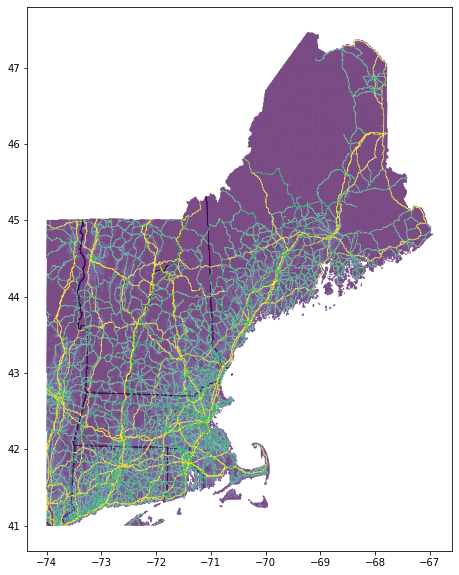

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
game_grid.plot(column='transport_score', ax=ax)

In [25]:
w,s,e,n = game_grid.total_bounds
print(w,s,e,n)

-74.0062751207002 40.995556258214776 -66.93832921282291 47.46624330268622
